 Lab5 Kernel Machines - Solutions
## Support Vector Machines
Reference:
This python notebook partially utilized the source of the book * 
* Python Machine Learning - Second Edition Sebastian Raschka, Vahid Mirjalili, September 2017

### iris dataset

In [1]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('Class labels:', np.unique(y))

Class labels: [0 1 2]


#### data preprocessing

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [3]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

In [4]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

#### support vector classifier from sklearn

In [2]:
from sklearn.svm import SVC
# help(SVC) # to read about help on class SVC in module sklearn.svm.classes:

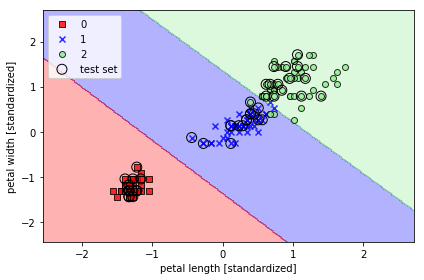

In [6]:
from sklearn.svm import SVC


svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, 
                      y_combined,
                      classifier=svm, 
                      test_idx=range(105, 150)
                     )
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

#### decision tree classifier from sklearn

In [7]:
from sklearn import tree
dtree = tree.DecisionTreeClassifier()
dtree.fit(X_train_std, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

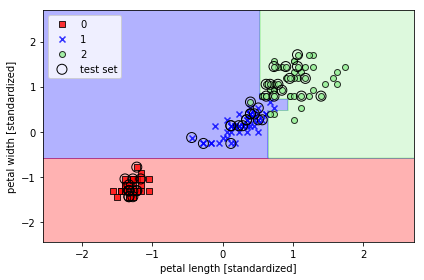

In [8]:

plot_decision_regions(X_combined_std, 
                      y_combined,
                      classifier=dtree, 
                      test_idx=range(105, 150)
                     )
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

#### MLPclassifier from sklearn

In [9]:
from sklearn.neural_network import MLPClassifier
mlp= MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(100,100), random_state=1, activation='logistic')
mlp.fit(X_train_std, y_train)

MLPClassifier(activation='logistic', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 100), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

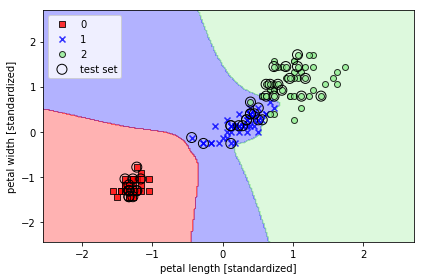

In [10]:
plot_decision_regions(X_combined_std, 
                      y_combined,
                      classifier=mlp, 
                      test_idx=range(105, 150)
                     )
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### XOR dataset

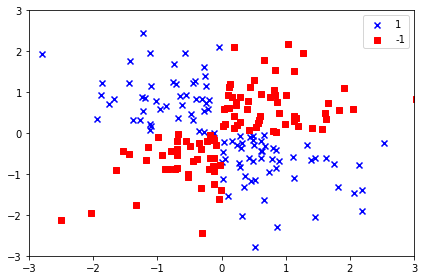

In [11]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='b', marker='x',
            label='1')
plt.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c='r',
            marker='s',
            label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

#### sklearn support vector classifier for XOR data

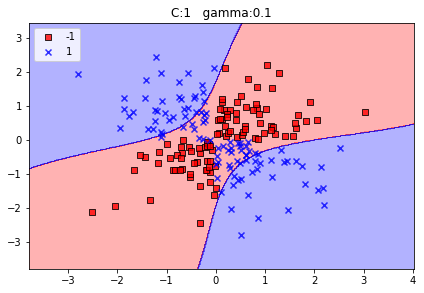

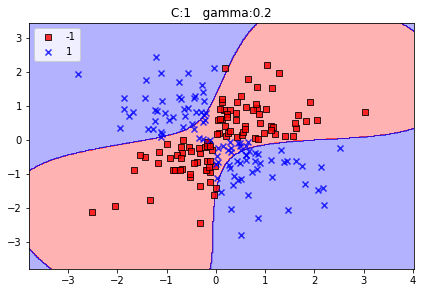

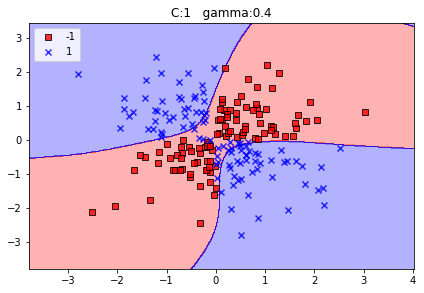

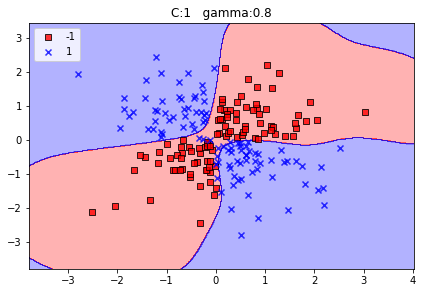

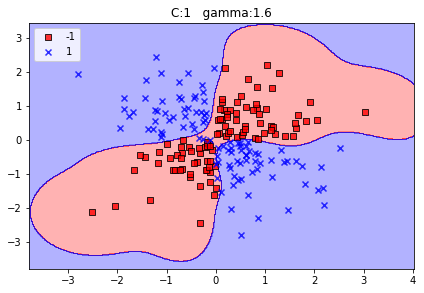

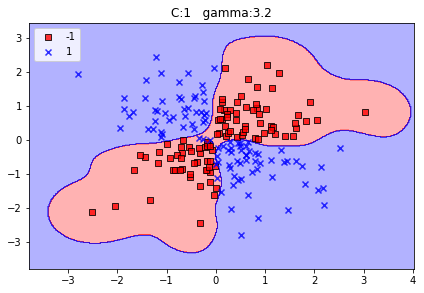

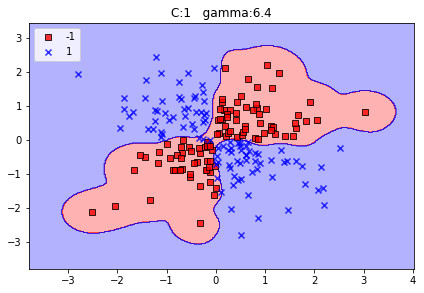

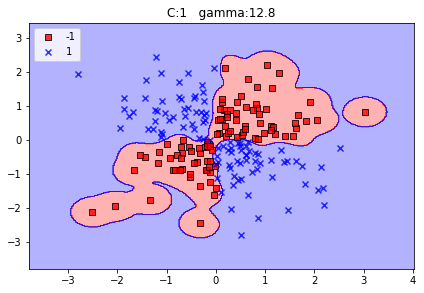

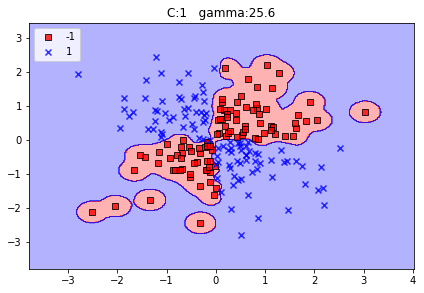

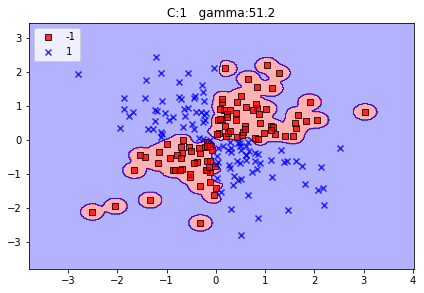

In [12]:
G=0.1
CC=1
for i in range(10):
 svm = SVC(kernel='rbf', random_state=1, gamma=G, C=CC)
 svm.fit(X_xor, y_xor)
 plot_decision_regions(X_xor, y_xor,
                      classifier=svm)

 plt.legend(loc='upper left')
 plt.tight_layout()
 plt.title('C:'+str(CC)+'   gamma:'+str(G))
 plt.show()
 G=G*2
 #CC=CC*2

# high C aims at classifying all instances correctly by taking more support vectors
# the gamma parameter is kind of adjusting the curvature of the decision boundary


## TASK 1

### Learn a SVM model to fit to following moon datatset 

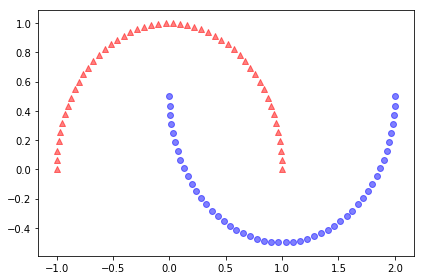

In [13]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, random_state=123)
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='o', alpha=0.5)

plt.tight_layout()
plt.show()

### Solution for task1

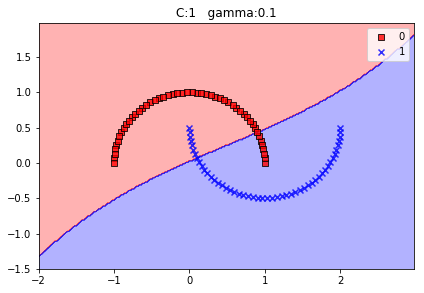

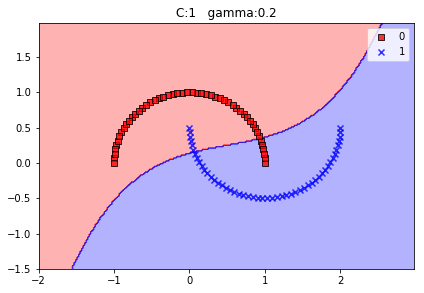

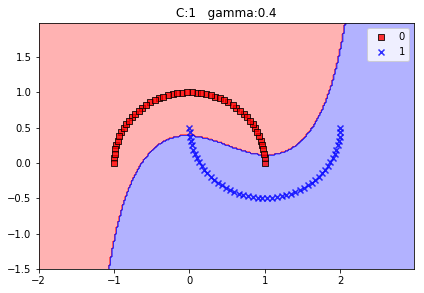

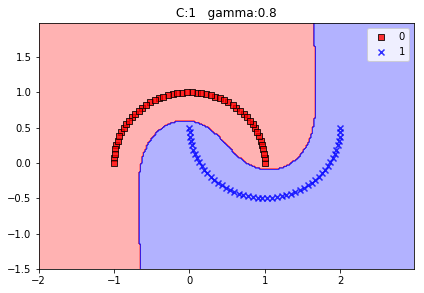

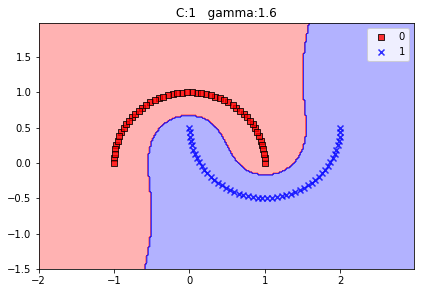

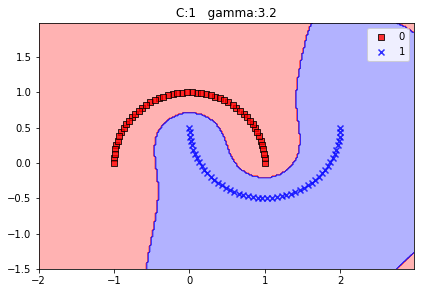

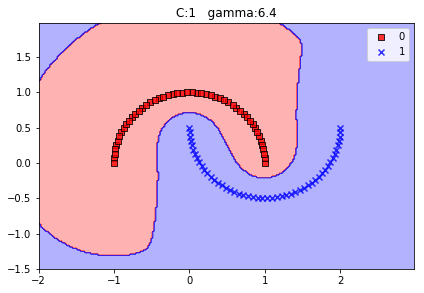

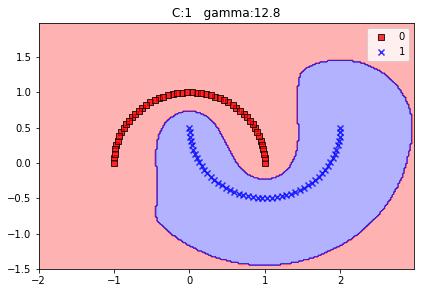

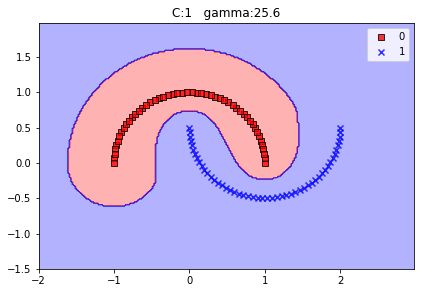

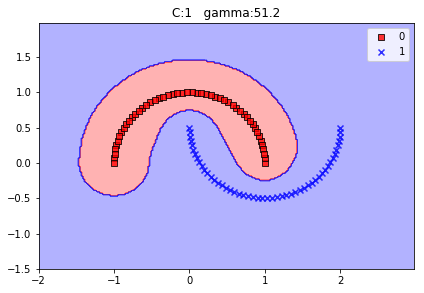

In [14]:
G=0.1
CC=1
for i in range(10):
    svm = SVC(kernel='rbf', random_state=1, gamma=G, C=CC)
    svm.fit(X, y)
    plot_decision_regions(X, y,
                      classifier=svm)

    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.title('C:'+str(CC)+'   gamma:'+str(G))
    plt.show()
    G = G * 2

## TASK 2:
### Fit the circle dataset and plot your SVM decision region



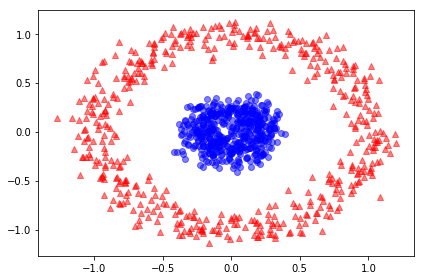

In [15]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)

plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='o', alpha=0.5)
plt.tight_layout()
plt.show()

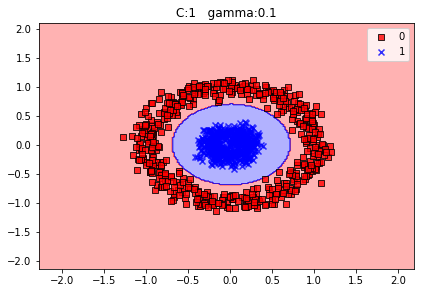

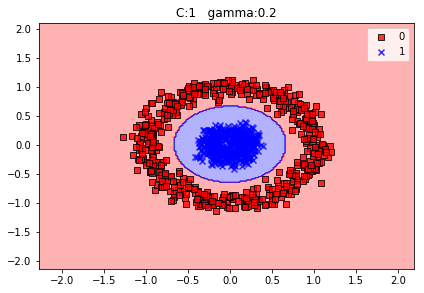

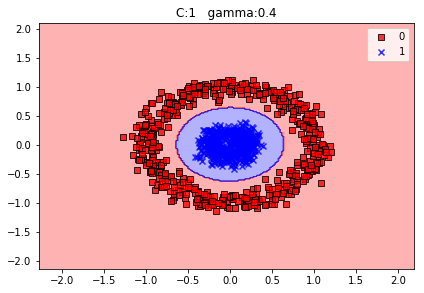

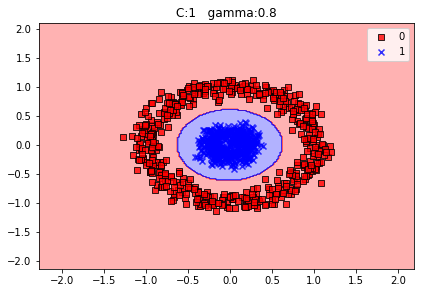

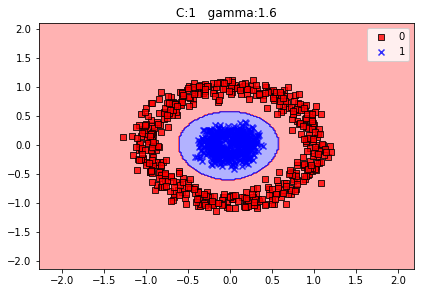

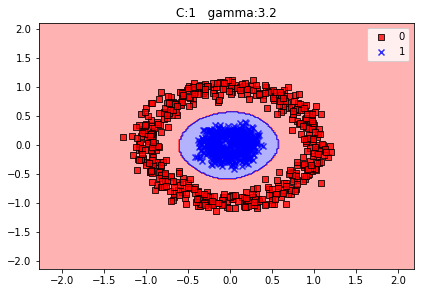

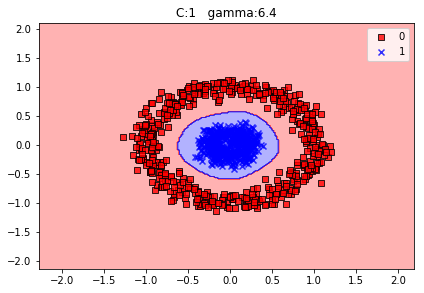

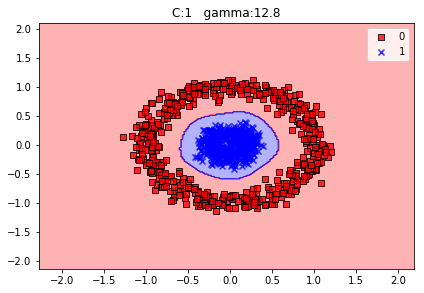

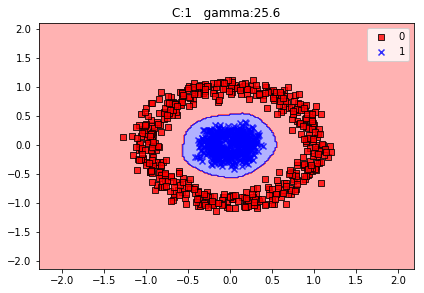

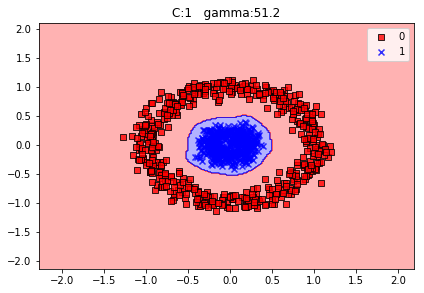

In [16]:
G=0.1
CC=1
for i in range(10):
    svm = SVC(kernel='rbf', random_state=1, gamma=G, C=CC)
    svm.fit(X, y)
    plot_decision_regions(X, y,
                      classifier=svm)

    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.title('C:'+str(CC)+'   gamma:'+str(G))
    plt.show()
    G = G * 2